# ***Layered Elastic Analysis for Pavements***
3D layered elastic analysis for calculating stresses and strains in flexible pavements. Currently only works for fully bonded layers. This program is for instructional purposes only and may contain errors. For source code, visit [github/egemenokte](https://github.com/egemenokte/3DLayeredElastic).

This program is built on top of PyMastic by [github/Mostafa-Nakhaei](https://github.com/Mostafa-Nakhaei/PyMastic). It is parallelized to make operations faster. Please note that responses near the surface are not reliable.

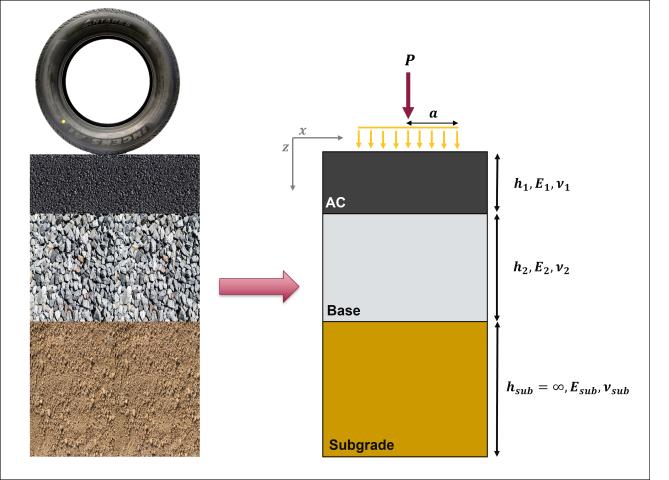

Side note: For quasi-static analysis, if you have your modulus data, you can use

freq(Hz)=0.2167\*V\*exp(-0.6398\*ln(a)-0.3112\*ln(z)+2.6780).

V=vehicle speed (kmh), a=contact radius (cm), z=depth (cm). Adapted from [Ghanizadeh et-al]( https://www.sciencedirect.com/science/article/pii/S1996681416301468)

# *Step 0* - First Things First! Mount your Colab to GitHub

*   You are given a GitHub repository (you may also download and run it yourself locally if you want)
*   Please follow the instructions provided in this document to execute and analyze data
*   Work your way sequentially, following the instructions above each cell.
*   If you run into errors, restart runtime from the Runtime tab.










In [22]:
!git clone https://github.com/egemenokte/3DLayeredElastic.git
%cd 3DLayeredElastic/Run

#Import packages necessary for analysis
import sys
import os
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from Main.MDA_Huang import Layer3D

#For plotting and interactive features. You may disable/comment out if you just want to run the analysis for a few points in step 1
from Main.Interactive_Functions import fewpoints, plot_interactive_heatmap
from IPython.display import clear_output, display
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

#The following are loaded in fewpoints and plot_interactive_heatmap
#from google.colab import files
#from scipy.interpolate import RegularGridInterpolator
#import plotly.graph_objects as go
#Function for converting everything to a dataset

for i in range(10):
    clear_output(wait=True)
    print("All good, move to the next step")

All good, move to the next step


# *Step 1* - Run Layered Elastic Analysis for a few points
You are given a structure with specific properties. You can change the modulus/thickness of different layers to see its impact on the design. Units have to be consistent, same with WinJulea. In this module only, strains are reported in microstrains

In [ ]:
## INPUTS, PLEASE USE CONSISTENT UNITS, SAME AS WIINJULEA
## YOU CAN CHANGE THESE PARAMETERS IF NECESSARY ################################
E = np.array([500, 50, 10])*1000   # Layer Modulus (psi), [Top Layer, Second to top layer,...,Subgrade]
H = [6, 18]                        # Layer Thicknesses (inch), [Top Layer, Second to top layer,...,nth layer]. Subgrade is not required and assumed semi-infinite
nu = [0.35, 0.4, 0.45]             # Poissons ratio, [Top Layer, Second to top layer,...,Subgrade]
L = [9000,9000]                    # Load Magnitudes (lbs). In this case, there are 2 loads, both 9000 lbs
LPos = [(10,0),(20,0)]             # Load positions as (x,y) (inch). In this case, there are two loads, one is at 10,0, other is at 20,0
a = 4                              # Contact radius (inch)
x = [10,15,20]                     # x query points for (inch)
y = [0]                            # y query points (inch)
z =[5.99]                          # z (depth) query points (inch)
download=False                     # download results as an excel file? [True or False]

'''Function Layer3D returns RS dictionary with keys

'deflection_z', 'sigma_x', 'sigma_y', 'sigma_z',
'sigma_xy', 'sigma_yz', 'sigma_xz', 'eps_x',
'eps_y', 'eps_z', 'eps_xy','eps_yz', 'eps_xz'

each contains the response (key)
at coordinates (y,x,z) --> RS[key][y,x,z]

'''
################DO NOT CHANGE BELOW THIS LINE#############################

##### Layered elastic analysis settings. Do not change unless slow or unstable
ZRO=7*1e-20                 # definition of zero to avoid division by zero
isBD=np.ones(len(E))        # assumes fully bonded
it = 1600                   # maximum number of iterations
tolerance=0.01              # average percent error of query points
every=10                    # check for convergence every x steps
#######
print('Running Elastic Analysis...')
RSO=Layer3D(L,LPos,a,x,y,z,H,E,nu,it,ZRO,isBD,tolerance,verbose=True,every=every)
print('Done')

## Save to a pandas dataset to display
for i in range(10):
    clear_output(wait=True)

DF=fewpoints(x,y,z,RSO,download) #Save as a dataframe and then display
DF

x    y     z  deflection_z     sigma_x     sigma_y    sigma_z  \
0  10.0  0.0  5.99      0.026031 -145.258597 -185.898003  37.170729   
1  15.0  0.0  5.99      0.026725 -113.304041 -183.441599  36.672261   
2  20.0  0.0  5.99      0.026031 -145.258597 -185.898003  37.170729   

       sigma_xy      sigma_yz  sigma_xz       eps_x       eps_y       eps_z  \
0 -4.976892e-15  7.162173e-16 -5.848358 -186.408101 -296.134499  306.151077   
1 -4.294687e-15  1.019314e-15  0.000000 -123.869545 -313.240953  281.066471   
2  0.000000e+00  0.000000e+00  5.848358 -186.408101 -296.134499  306.151077   

         eps_xy        eps_yz     eps_xz  
0 -2.687522e-14  3.867574e-15 -31.581136  
1 -2.319131e-14  5.504295e-15   0.000000  
2  0.000000e+00  0.000000e+00  31.581136

# *Step 2* - Run Layered Elastic Analysis for Visualization
We can also run this analysis on a grid to visualize outputs better by changing the z and x values to an array. You should change x and z values to create an array where you would like to display results.

For example, if the load position is at `x=10`, you can select `x = np.arange(0,21,1)` to look at every inch between 0 and 20

When you see `done`, you can move to the next cell

In [ ]:
## YOU CAN CHANGE THESE PARAMETERS IF NECESSARY################################
E = np.array([500, 50, 10])*1000   # Layer Modulus (psi), [Top Layer, Second to top layer,...,Subgrade]
H = [6, 18]                        # Layer Thicknesses (inch), [Top Layer, Second to top layer,...,nth layer]. Subgrade is not required and assumed semi-infinite
nu = [0.35, 0.4, 0.45]             # Poissons ratio, [Top Layer, Second to top layer,...,Subgrade]
L = [9000,9000]                    # Load Magnitudes (lbs)
LPos = [(10,0),(20,0)]             # Load positions as (x,y) (inch)
a = 4                              # Contact radius (inch)
x = np.arange(0,31,1)              # x query points for (inch). In this example, we are looking from 0 to 31
y = [0]                            # y query points (inch). In this example, not interested in y for now
z = np.arange(0,31,1)              # z (depth) query points (inch). In this example, Interested in depths from 0 to 31
###############################################################################

############################ DO NOT CHANGE BELOW THIS LINE#####################
# Generate new z values just below and above each cumulative sum value
cumulative_sums = np.cumsum(H)
z = np.sort(np.concatenate((z, cumulative_sums - 0.01, cumulative_sums + 0.01)))
## Layered elastic analysis settings. Do not change unless slow or unstable
ZRO=7*1e-20
isBD=np.ones(len(E))
it = 1600            # number of maximum iterations
tolerance=0.01       # average percent error of query points
every=100            # check for convergence every x steps
print('Running Elastic Analysis...')
RS=Layer3D(L,LPos,a,x,y,z,H,E,nu,it,ZRO,isBD,tolerance,verbose=True,every=every)
print('Done')
sns.set(rc={'figure.figsize':(20,10)},font_scale=1.15)

Running Elastic Analysis...
Load  1 / 2
iteration 200  error: 0.4148 %
iteration 300  error: 0.0194 %
iteration 400  error: 0.0137 %
iteration 500  error: 0.0052 %
Load  2 / 2
iteration 200  error: 0.4148 %
iteration 300  error: 0.0194 %
iteration 400  error: 0.0137 %
iteration 500  error: 0.0052 %
Done


# Step 3 - Heatmaps
Let's see the results by plotting them as a heatmap at first y index. You can manually change the response to change which response to plot.

Please use keys or column names as reference


In [ ]:
# plot_interactive_heatmap('Title for Data', Data, 'Label for Data', x, z, H ,aspect=(15,8))
# for strains use eps_, for stress use sigma_, for displacement use displacement_
# For strain in x use eps_x, for y use eps_y, etc

#If results are nonsensical, please pass interpolate=False

##########First example
aspect=(10,8)
Resp='sigma_z' #Response to evaluate. You can change this response to anything
data = (RS[Resp][0, :, :]) #Do not change
##
#Do not change, other than label and interpolate
plot_interactive_heatmap(title=f'{Resp}',data=data,label='Stress (psi)', x=x, z=z, H=H, aspect=aspect,interpolate=True)

##########Second example
Resp='eps_z' #Response to evaluate. You can change this response to anything
data = (RS[Resp][0, :, :]) #Do not change
##
#Do not change, other than label and interpolate
plot_interactive_heatmap(title=f'{Resp}',data=data,label='Strain', x=x, z=z, H=H, aspect=aspect,interpolate=True)

##########Third example
Resp='eps_y' #Response to evaluate. You can change this response to anything
data = (RS[Resp][0, :, :]) #Do not change
##
#Do not change, other than label and interpolate
plot_interactive_heatmap(title=f'{Resp}',data=data,label='Strain', x=x, z=z, H=H, aspect=aspect,interpolate=True)


# *Step 4* - Plotting with respect to depth at a given x
Plotting with respect to depth for a given x. You can change the interactive dialogs to plot different responses. Please use keys or column names for reference. For instance, use `'eps_z'` for compressive vertical strain.

By default, it plots response with respect to depth, directly underneath the first load

In [ ]:
response='sigma_z' #default response. You can change it here, or below in the response box
idx=(np.abs(np.array(x) - LPos[0][0])).argmin() #index under the load by default. You can toggle it with the slider

#### DO NOT CHANGE BELOW THIS LINE#####
@interact(xx=widgets.IntSlider(min=0, max=len(x)-1, step=1, value=idx), response=response)
def plotx(response=response,xx=0):
  response=response
  A=np.transpose(RS[response][0,:,:])
  idx=xx
  sns.scatterplot(x=A[:,idx],y=-z,s=70) #plot the idx x element from left
  plt.xlabel('response (response units)')
  plt.ylabel('z')
  plt.title(response+' at x='+str(x[idx]))
  plt.show()

interactive(children=(Text(value='sigma_z', description='response'), IntSlider(value=10, description='xx', max…

# *Step 5* - Plotting with respect to x at a given depth
Plotting with respect to x for a given depth. You can change the interactive dialogs to plot different responses. Please use keys or column names for reference. For instance, use 'eps_z' for compressive vertical strain.

By default, it plots response with respect to x, at the third depth evaluation point

In [ ]:
response='sigma_z' #default response. You can change it here, or below in the response box

#### DO NOT CHANGE BELOW THIS LINE#####
@interact(depth=widgets.IntSlider(min=0, max=len(z)-1, step=1, value=3), response=response)
def plotz(response=response,depth=0):
  response=response
  depthindex = depth
  #depthindex=6 #how deep do we want to go?
  A=np.transpose(RS[response][0,:,:])

  sns.scatterplot(y=A[depthindex,:],x=x,s=70) #plot the idx x element from left
  plt.xlabel('x')
  plt.ylabel('response (response units)')
  plt.title(response+' at z ='+str(z[depth]))
  plt.show()

interactive(children=(Text(value='sigma_z', description='response'), IntSlider(value=3, description='depth', m…

# *Step 6* - Comparing Different Structures
We can compare different structures by running additional analysis and keeping the previous one as baseline.

Define a new structure below and compare the responses. By default, the AC thickness is reduced from 6in to 2in.

In [ ]:
## YOU CAN CHANGE THESE PARAMETERS IF NECESSARY################################
E = np.array([500, 50, 10])*1000   # Layer Modulus (psi), [Top Layer, Second to top layer,...,Subgrade]
H = [2, 18]                        # Layer Thicknesses (inch), [Top Layer, Second to top layer,...,nth layer]. Subgrade is not required and assumed semi-infinite
nu = [0.35, 0.4, 0.45]             # Poissons ratio, [Top Layer, Second to top layer,...,Subgrade]
L=[9000,9000]                      # Load Magnitudes (lbs)
LPos=[(10,0),(20,0)]               # Load positions as (x,y) (inch)
a = 4                              # Contact radius (inch)
x = x                              # keep the same with the previous structrue! x query points for (inch)
y = y                              # keep the same with the previous structrue! y query points (inch)
z = z                              # keep the same with the previous structrue! z (depth) query points (inch)
###############################################################################
print('Running Elastic Analysis...')
RS2=Layer3D(L,LPos,a,x,y,z,H,E,nu,it,ZRO,np.ones(len(E)),tolerance,verbose=True) #This is the second structure to compare
print('Done')

Running Elastic Analysis...
Load  1 / 2
iteration 200  error: 1.0773 %
iteration 300  error: 0.0352 %
iteration 400  error: 0.0146 %
iteration 500  error: 0.0048 %
Load  2 / 2
iteration 200  error: 1.0773 %
iteration 300  error: 0.0352 %
iteration 400  error: 0.0146 %
iteration 500  error: 0.0048 %
Done


Now we can compare structures. This example is for plotting a response with respect to depth for a given x.

You can change the response to plot different responses. Please use keys or column names for reference. For instance, use 'eps_z' for compressive vertical strain

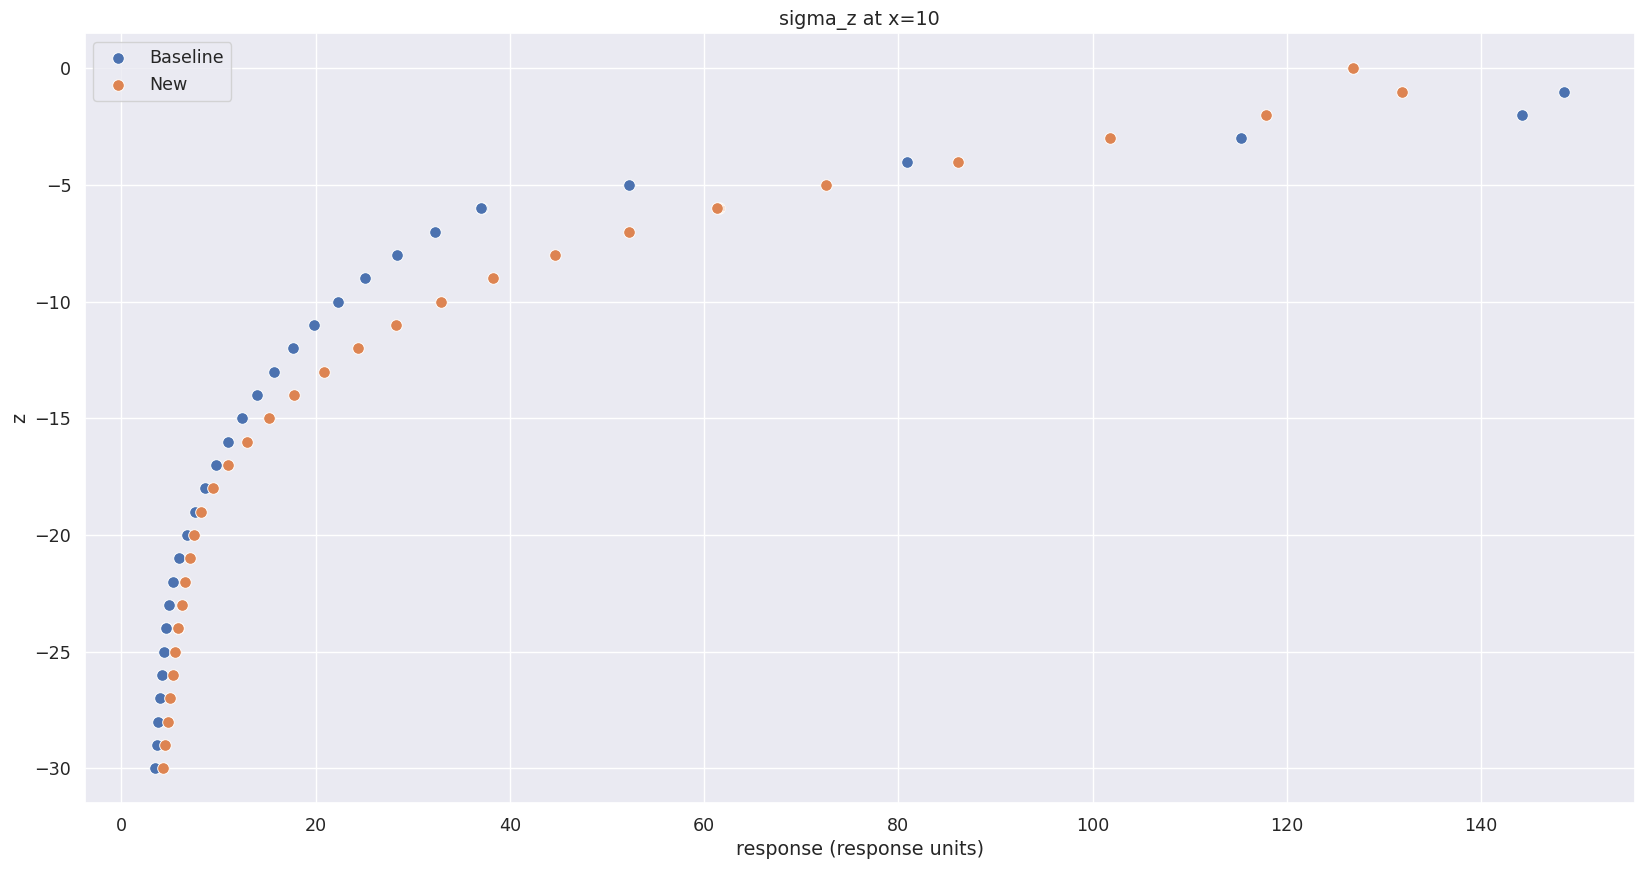

In [ ]:
response='sigma_z' #default response. You can change it here.


### By default, this plots response with respect to depth. You can modify it to do anything else##
A=np.transpose(RS[response][0,:,:]) #Get the response from first structure
B=np.transpose(RS2[response][0,:,:]) #Get the response from second structure

idxA = (np.abs(np.array(x) - LPos[0][0])).argmin() #index under the load for first structrue
idxB = (np.abs(np.array(x) - LPos[0][0])).argmin() #index under the load for second structrue
sns.scatterplot(x=A[:,idxA],y=-z,s=70,label='Baseline') #plot the first structure
sns.scatterplot(x=B[:,idxB],y=-z,s=70,label='New') #plot the second structure
plt.xlabel('response (response units)')
plt.ylabel('z')
plt.title(response+' at x='+str(x[idx]))
plt.legend()